<h1 style="color:#FF5A60">Exploring Airbnb: A Data-Driven Dive into the World of Shared Accommodation</h1>

Airbnb, a household name in the realm of shared accommodations and travel experiences, has revolutionized the way we travel. By offering unique stays and activities, it has provided travelers with more localized and personalized experiences. But what do the numbers say? With a myriad of hosts, properties, and guests, there's a vast trove of data that can offer insights into the platform's dynamics, trends, and user behaviors.

Having seen my parents operate an Airbnb property, I've always been intrigued by the dynamics of this platform. My personal connection piqued my curiosity, prompting me to dive deeper. I recently found an intriguing dataset related to Airbnb. After skimming through the data, I recognized a unique chance: to decipher the stories and patterns concealed within the data and embark on an insightful analytical journey.

In this analysis, I will endeavor to:

* Understand the distribution of property types and their popularity.
* Dive into the pricing dynamics and see if there are any discernible patterns.
* Explore the reviews to gauge the overall guest satisfaction.
* ... and much more.

As we traverse through this dataset, we'll uncover trends, anomalies, and potential insights that could shed light on the intricate dance of hosts, guests, and properties on Airbnb.

Let's begin this adventure!

<span style="color:green">Import Libraries</span> 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Examine database structure and get a baseline

In [2]:
df = pd.read_csv('airbnb_2.csv')
print(df.head())
print('Shape: ',df.shape,'\n',df.columns)

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude   
0         John            Brooklyn    Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review   
0     Private room    149               1                  9  19

### Step I: <span style="color:green">Delving into Neighbourhood Groups with Pandas</span> 

#### I aim to determine the distribution of Airbnb listings across the five primary Neighbourhood Groups: Manhattan, Brooklyn, Queens, Bronx, and Staten Island. Furthermore, I'm curious to find out which of these Neighbourhood Groups boasts the highest number of Airbnb listings.

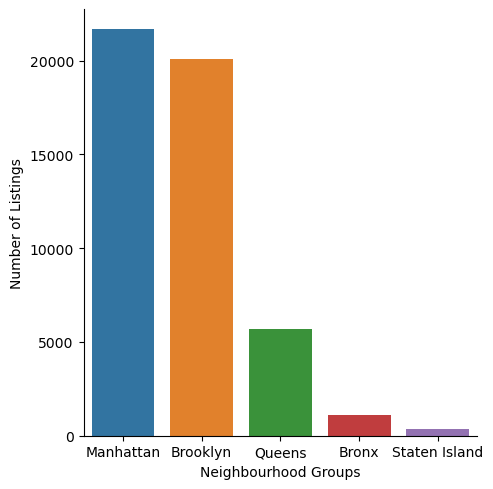

In [3]:
sns.catplot(data=df,kind='count',x='neighbourhood_group', \
            order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Number of Listings")
plt.show()

#### Our analysis will prioritize the Neighbourhood Groups that rank in the top three for the number of Airbnb listings.
#### I'm interested in determining the percentage of listings that each Neighbourhood Group holds.

In [4]:
perc_listings = df.groupby('neighbourhood_group')['id'].count()/df['id'].count()
print(perc_listings)

neighbourhood_group
Bronx            0.022313
Brooklyn         0.411167
Manhattan        0.443011
Queens           0.115881
Staten Island    0.007629
Name: id, dtype: float64


### Step II: <span style="color:green">Revenue Insights</span> 
#### Here, I've created a new field named 'Revenue'and integrate it into the Airbnb Dataframe.
#### To visually assess which Neighbourhood Group generates the highest revenues, a Bar Plot can be made.

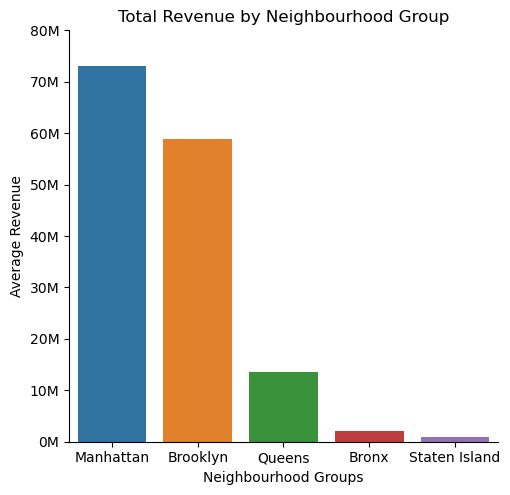

In [5]:
df['revenue'] = df.price*df.number_of_reviews
neighbourhood_revenue = df.groupby('neighbourhood_group')['revenue'].sum().reset_index()
sns.catplot(data=neighbourhood_revenue,x='neighbourhood_group',y='revenue',kind='bar',\
            order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])

# Determine the maximum revenue value in the data
max_revenue = neighbourhood_revenue['revenue'].max()
# Generate ticks based on this maximum value in intervals of 10 million
interval = 1e7
new_ticks = list(range(0, int(max_revenue) + int(interval), int(interval)))
# Create labels for these ticks to represent values in millions
new_labels_in_millions = ['{}M'.format(int(tick/1e6)) for tick in new_ticks]

plt.yticks(new_ticks,new_labels_in_millions)
plt.title('Total Revenue by Neighbourhood Group')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Revenue')
plt.show()

### Step III: <span style="color:green">Neighbourhood Revenue Analysis</span> 

I've decided to narrow down our dataset to focus solely on the Neighbourhood Groups of Manhattan, Brooklyn, and Queens.

With this filtered view, my goal is to pinpoint the three highest revenue-generating neighborhoods within each Neighbourhood Group. This will result in a concise list of 9 neighborhoods - the top three from each of the specified Neighbourhood Groups.


Here is the logic behind my filtering as it can get hard to read.

    Setting Conditions:
        condition1 = DataFrame['columnName'] == 'conditionValue'
        condition2 = DataFrame['columnName'] == 'anotherConditionValue'

    Filtering the Dataframe:
        filtered_dataframe = DataFrame[condition1 OR condition2]

    Grouping the Data: 
        The data is grouped by the neighbourhood groups, and the individual neighbourhoods in each group.

In [6]:
# Find the total revenue by neighbourhood_group
neighbourhood_group_rev = df.groupby('neighbourhood_group')['revenue'].sum().reset_index()

# Find the total revenue by neighbourhood_group and neighbourhood
neighbourhood_by_group = df.groupby(['neighbourhood_group','neighbourhood'])['revenue'].sum().reset_index()


top_neighbourhood_group = (
    neighbourhood_group_rev # take the 3 highest revenues from neighbourhood_group
    .nlargest(3,'revenue')
    ['neighbourhood_group']
    .tolist() # convert to a list to filter from later
)

top_neighbourhood = (
    neighbourhood_by_group[neighbourhood_by_group['neighbourhood_group']
    .isin(top_neighbourhood_group)] #filter out the bottom 2 from neighbourhood_group
    .groupby('neighbourhood_group')
    # map the .nlargest method to the 'revenue' column since we created a series
    .apply(lambda x: x.nlargest(3,'revenue'))
    .reset_index(drop=True)
)
print(top_neighbourhood)

  neighbourhood_group       neighbourhood   revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2            Brooklyn            Bushwick   4762224
3           Manhattan              Harlem   8598692
4           Manhattan      Hell's Kitchen   8238991
5           Manhattan        East Village   7574535
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


### Step IV: <span style="color:green">Focus on Top Revenue Neighbourhoods</span> 
Building upon our earlier exploration, where we pinpointed the top 3 neighborhoods within each neighborhood group by revenue, let's narrow down our dataset to focus solely on these prominent neighborhoods.

Our goal now is to discern the room type that, on average, yields the highest revenue within each of these nine neighborhoods. We'll visualize our findings using a bar chart.

Here is the logic I used to accomplish this:
    
 1. Filtering Relevant Neighbourhoods:
    * Identified and selected the top 3 neighbourhoods from the top 3 neighbourhood groups. This list was then used to filter the main dataset to only include rows pertaining to these specific neighbourhoods.

 2. Calculating Average Revenue by Room Type:
    * Grouped the filtered data by 'neighbourhood' and 'room_type', and then calculated the average revenue for each room type within each neighbourhood.
    * Sorted the data first alphabetically by neighbourhood and then by descending order of revenue to ensure the highest earning room types are at the top for each neighbourhood.
    * From this sorted data, picked the top room type for each neighbourhood.

 3. Visualization:
    * Used a bar plot to visualize the top earning room type in each of the key neighbourhoods. The room type was included in the X-axis label for clarity.
    * Enhanced the readability of the plot by adjusting the X-axis labels and setting an appropriate figure size.

This approach provided a clear picture of the most lucrative room types across these prime neighbourhoods.

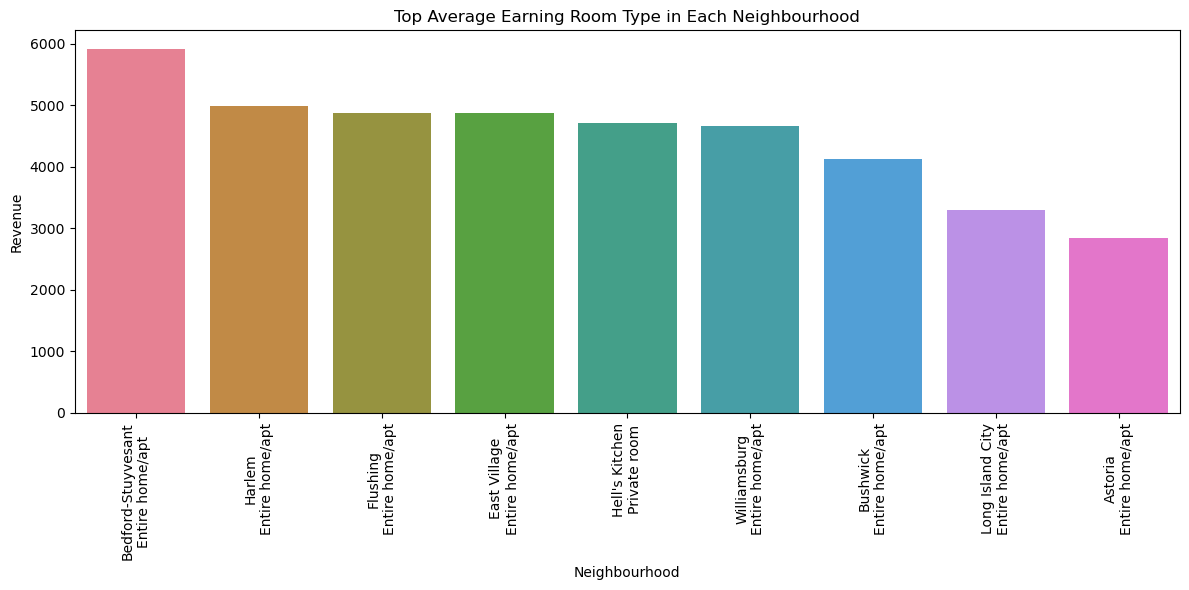

In [7]:
# Define a list of top 3 neighbourhoods from each of the top 3 neighbourhood groups
# List can also be accomplished with: list_neighbourhoods= top_neighbourhood['neighbourhood'].tolist()
list_neighbourhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Harlem', \
                       "Hell's Kitchen", 'East Village', 'Astoria', 'Long Island City', 'Flushing']

# Filter dataset to only include listings from the selected neighbourhoods
in_neighbourhoods = df[df['neighbourhood'].isin(list_neighbourhoods)]

# Compute average revenue by room type for each neighbourhood and select top room type by revenue for each neighbourhood
top_room_type = (
    in_neighbourhoods
    .groupby(['neighbourhood','room_type'])['revenue'] # by each neighbourhood, aggregate the revenue column
    .mean()# find average revenue 
    .reset_index() # reset the index to cast as a dataframe instead of a series
    .sort_values(['neighbourhood','revenue'],ascending=[True,False]) # sort alphabetically then by most revenue
    .groupby('neighbourhood') # again group by neighbourhood
    .head(1) # select the 1st room type for each neighbourhood
    .reset_index(drop=True) # reset index to cast back to a dataframe
)

# Sort the data
top_room_type = top_room_type.sort_values('revenue',ascending=False)


# Set up the plot dimensions and colors
plt.figure(figsize=(12, 6))
sns.set_palette("husl",9)

# Plot average earning room type in each of the key neighbourhoods
ax = sns.barplot(data=top_room_type, x='neighbourhood', y='revenue')

# Set labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue')
plt.title('Top Average Earning Room Type in Each Neighbourhood')

# Rotate the x axis labels for clarity
plt.xticks(rotation=90)

# Adjust x-axis labels to show both neighbourhood and room type
x_labels = [f"{neighbourhood}\n{room_type}" for neighbourhood, \
            room_type in zip(top_room_type['neighbourhood'], top_room_type['room_type'])]
ax.set_xticklabels(x_labels)

# Ensure the plot layout is organized and display
plt.tight_layout()
plt.show()

## Summary of Airbnb Analysis

In our exploration of Airbnb data, we embarked on a multi-step journey to understand the intricacies of the platform's performance in key New York neighborhoods:

1. **Initial Exploration:** We began by examining the distribution of Airbnb listings across various neighborhood groups. Manhattan, Brooklyn, and Queens emerged as the areas with the highest number of listings, capturing our primary focus for further analysis.

2. **Revenue Insights:** We then explored the potential revenue generation across these listings. By multiplying the price of a listing with its number of reviews, we estimated the potential revenue for each listing. Our analysis revealed that while some neighborhoods have a higher number of listings, it doesn't necessarily mean they generate the highest revenue.

3. **Drilling Deeper:** To get a granular perspective, we identified the top three neighborhoods within Manhattan, Brooklyn, and Queens based on the revenue generated. This helped us pinpoint exact areas that are not only popular but also lucrative for hosts.

4. **Room Type Analysis:** In our final analysis step, we delved into the types of rooms (e.g., entire homes, private rooms) that generated the most revenue within the top-performing neighborhoods. This provided insights into guest preferences and potential areas of focus for new or existing hosts.

The visuals, especially the bar charts, played a crucial role in making our findings easily digestible. They illuminated patterns and trends that might have been obscured in raw data.

In conclusion, this analysis offers a roadmap for potential hosts on Airbnb. By understanding which neighborhoods and room types are the most lucrative, hosts can make informed decisions about where to list their properties and how to price them. Moreover, for Airbnb and policymakers, this exploration underscores the importance of these prime neighborhoods in the broader ecosystem of New York's short-term rental market.

Thank you for accompanying me on this analytical journey. Your insights and curiosity have been invaluable, and I look forward to diving into more datasets in the future with you!

## Let's Connect

I'm always eager to take on new challenges and to collaborate with fellow data enthusiasts. Whether you're a recruiter looking for talent, a peer wanting to collaborate, or just someone curious about data, I'd love to connect.
  

  [LinkedIn](https://www.linkedin.com/in/miles-stripling)
  
  [Tableau](https://public.tableau.com/app/profile/miles.stripling?authMode=activationSuccess)

